In [54]:
!pip install deap

In [56]:
import operator
import math
import random
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from deap import algorithms, base, creator, tools, gp


In [57]:
def evalSymbReg(individual):
    # Transform the tree expression into a callable function
    func = toolbox.compile(expr=individual)
    # Try evaluating the function on the dataset
    try:
        diff = sum((func(row[0]) - row[1]) ** 2 for row in data_points)
        error = diff / len(data_points)
        if error > 10:
            error = 10
        nodes, edges, labels = gp.graph(individual)
        return error, len(nodes)
    except Exception as e:
        # If any exception occurs during evaluation, return a high error value
        return 10, 0

# Define the protected functions as provided
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def psin(n):
    try:
        return numpy.sin(n)
    except Exception:
        return numpy.nan

def pcos(n):
    try:
        return numpy.cos(n)
    except Exception:
        return numpy.nan

def pow2(n):
    return operator.pow(n, 2)


In [58]:
# Dataset
data_points = [(0.05, -5.920472905375246e-06), (0.35, -0.008657128698830847), (0.65, -0.04893233110534319), (0.95, -0.09650694284366339), (1.25, -0.1198965923123214), (1.55, -0.01609080392499869), (1.85, 0.3309083626081094), (2.15, 0.733608667330639), (2.45, 0.8186871380016217), (2.75, 0.5321544028706404), (3.05, 0.1234051649414878), (3.35, -0.278182980554089), (3.649999999999999, -0.6486636751053088), (3.95, -0.8067957595201792), (4.25, -0.5933828647782589), (4.55, -0.1838193240995138), (4.85, 0.1050201247164789), (5.150000000000001, 0.1983465163192565), (5.450000000000001, 0.2186475486424381), (5.750000000000001, 0.2059303444221521), (6.050000000000001, 0.1112902435947829), (6.350000000000001, -0.02966156204610288), (6.650000000000001, -0.1121040527995223), (6.950000000000001, -0.1093909383615195), (7.250000000000002, -0.0778333184274862), (7.550000000000001, -0.04704394290562166), (7.850000000000001, -0.0007476897199050684), (8.150000000000002, 0.05525309487567331), (8.450000000000001, 0.08300536348115052), (8.750000000000002, 0.06756590687044263), (9.05, 0.03333770111075977), (9.350000000000001, 0.005325315277578894), (9.65, -0.01321537564831456), (9.950000000000001, -0.02483287990250848), (0.15, -0.0004197490074396078), (0.25, -0.002744011962215962), (0.45, -0.01888024838080345), (0.55, -0.03281107258572483), (0.75, -0.06560096236716338), (0.85, -0.08166740530354051), (1.05, -0.109383732295163), (1.15, -0.1184462034256205), (1.35, -0.1078791480794438), (1.45, -0.07538681808122603), (1.65, 0.07339461083608066), (1.75, 0.1915363368441183), (1.95, 0.4786681161315149), (2.05, 0.6185024362862599), (2.25, 0.809947806298645), (2.35, 0.8389089510601118), (2.55, 0.7540465107814242), (2.65, 0.6546009929076181), (2.85, 0.3978806420930439), (2.95, 0.2601276974469659), (3.15, -0.01126090293203677), (3.25, -0.1448333887352612), (3.45, -0.4101234722641215), (3.55, -0.5362052262266439), (3.75, -0.7375694202701226), (3.85, -0.7928746150065994), (4.05, -0.775882243022089), (4.15, -0.7022105431691226), (4.35, -0.4613247003684112), (4.45, -0.3201803624891209), (4.65, -0.06353862043288007), (4.75, 0.03353251584373382), (4.95, 0.1528419944793204), (5.05, 0.1819037178326882), (5.25, 0.207808845646738), (5.35, 0.21411380276363), (5.55, 0.220495761638348), (5.65, 0.2172098057887873), (5.85, 0.1845345578223014), (5.95, 0.1525012685657079), (6.15, 0.06417488813893034), (6.25, 0.01561163500816949), (6.45, -0.06755482772181315), (6.55, -0.09535622462919775), (6.75, -0.1185458646762452), (6.85, -0.1167340980679437), (7.05, -0.09921681054057341), (7.15, -0.08831177985834694), (7.35, -0.0679429329999461), (7.45, -0.05801810054578526), (7.65, -0.03406468214166072), (7.75, -0.01857349990905337), (7.95, 0.01851620555565741), (8.05, 0.03775899036260407), (8.25, 0.06935268923669112), (8.35, 0.07881262857403715), (8.55, 0.08199608838545486), (8.65, 0.07647337762906103), (8.85, 0.05659811005778664), (8.95, 0.04484486737005573), (9.15, 0.02275613893719095), (9.25, 0.01341375547071004), (9.45, -0.001675269226643721), (9.55, -0.007803671898095639), (9.75, -0.01794152679802587), (9.85, -0.02187959202330041)]


In [59]:
# Function set definition
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(psin, 1)
pset.addPrimitive(pcos, 1)
pset.addPrimitive(pow2, 1)

pset.addEphemeralConstant("rand101", lambda: random.random())

/usr/local/lib/python3.10/dist-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


In [67]:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9
P_MUTATION = 0.01
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10



MIN_TREE_HEIGHT = 3
MAX_TREE_HEIGHT = 5
LIMIT_TREE_HEIGHT = 17
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 5



In [61]:
# GP Algorithm Execution
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))

# create the Individual class based on the primitive tree:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# create a helper function for creating random trees using the primitive set:
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

# create the individual operator to fill up an Individual instance:
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

# create the population operator to generate a list of individuals:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# create an operator to compile the primitive tree into python code:
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", evalSymbReg)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [76]:


# Initialize population and statistics objects
pop = toolbox.population(n=POPULATION_SIZE)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)


stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [69]:

# Run the GP algorithm
pop, logbook = algorithms.eaSimple(pop, toolbox,
                                   cxpb=P_CROSSOVER,
                                   mutpb=P_MUTATION,
                                   ngen=MAX_GENERATIONS,
                                   stats=mstats,
                                   halloffame=hof,
                                   verbose=True)

# Retrieve and display the best individual
best_individual = hof[0]
print("Best Individual:", best_individual)

   	      	                       fitness                       	                      size                     
   	      	-----------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max	min       	nevals	std  	avg   	gen	max	min	nevals	std    
0  	0     	52.0951	0  	128	0.00292551	0     	52.84	103.79	0  	128	4  	0     	15.3651


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


1  	268   	52.1096	1  	134	0.00290664	268   	52.7777	103.9 	1  	134	2  	268   	14.2848
2  	268   	51.696 	2  	127	0.00289271	268   	52.3141	103.137	2  	127	16 	268   	13.3887
3  	278   	52.1893	3  	143	0.00285652	278   	52.6861	104.14 	3  	143	2  	278   	12.3348
4  	264   	51.254 	4  	133	0.00285652	264   	52.1727	102.273	4  	133	3  	264   	15.3731
5  	264   	51.2644	5  	123	0.00285652	264   	51.6198	102.29 	5  	123	22 	264   	10.9638
6  	270   	50.9051	6  	133	0.00281785	270   	51.9068	101.543	6  	133	3  	270   	16.0728
7  	280   	51.6741	7  	130	0.00281785	280   	52.1145	103.15 	7  	130	2  	280   	11.4499
8  	282   	51.4161	8  	127	0.00281785	282   	52.2742	102.387	8  	127	2  	282   	16.2941


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


9  	262   	51.9846	9  	138	0.00281785	262   	52.7264	103.68 	9  	138	2  	262   	14.594 
10 	268   	53.0223	10 	202	0.00281785	268   	53.8961	105.9  	10 	202	3  	268   	14.7125
11 	268   	52.0734	11 	135	0.00281764	268   	52.9529	103.873	11 	135	2  	268   	15.4819
12 	274   	52.3477	12 	133	0.00281764	274   	52.8142	104.363	12 	133	20 	274   	12.8433
13 	260   	52.5373	13 	129	0.00281335	260   	53.0065	104.893	13 	129	4  	260   	11.6557


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


14 	274   	52.786 	14 	132	0.00275604	274   	53.0791	105.35 	14 	132	46 	274   	10.3547
15 	284   	52.6395	15 	130	0.00281335	284   	53.1076	105.003	15 	130	3  	284   	12.4345
16 	268   	52.4189	16 	131	0.00280595	268   	52.7806	104.45 	16 	131	2  	268   	12.4151
17 	263   	52.2014	17 	134	0.00280595	263   	53.0106	104.117	17 	134	2  	263   	15.0821
18 	266   	52.9111	18 	151	0.00280858	266   	53.4215	105.52 	18 	151	18 	266   	13.0308
19 	264   	52.672 	19 	135	0.00280858	264   	53.4393	105.053	19 	135	4  	264   	14.8879
20 	265   	53.0292	20 	131	0.00280858	265   	53.7402	105.903	20 	131	3  	265   	13.5512
21 	264   	53.4706	21 	178	0.00280024	264   	54.4366	106.613	21 	178	2  	264   	16.6053


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


22 	284   	53.3468	22 	202	0.00280024	284   	54.3184	106.44 	22 	202	4  	284   	16.1619


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


23 	264   	53.0715	23 	147	0.00280024	264   	54.0906	105.8  	23 	147	2  	264   	16.9768
24 	274   	54.1479	24 	142	0.00280024	274   	54.961 	107.897	24 	142	2  	274   	16.1307
25 	276   	55.4684	25 	162	0.00280024	276   	56.1027	110.813	25 	162	19 	276   	12.9666
26 	267   	56.0247	26 	133	0.00268321	267   	56.6392	111.877	26 	133	2  	267   	13.2613
27 	278   	56.0199	27 	138	0.00268321	278   	56.6571	111.673	27 	138	7  	278   	14.9207
28 	262   	56.6822	28 	132	0.00268321	262   	57.5026	113.08 	28 	132	2  	262   	15.7973


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


29 	278   	57.3224	29 	143	0.00267476	278   	57.9177	114.463	29 	143	4  	278   	13.3182
30 	280   	57.251 	30 	141	0.00267308	280   	57.6083	114.23 	30 	141	13 	280   	11.9137
31 	276   	55.8928	31 	138	0.00267308	276   	57.1978	111.433	31 	138	2  	276   	19.261 
32 	270   	56.8197	32 	151	0.00267308	270   	57.4964	113.38 	32 	151	3  	270   	14.5413
33 	267   	56.3571	33 	148	0.00267308	267   	57.3494	112.477	33 	148	6  	267   	16.6536
34 	267   	56.5447	34 	136	0.00267308	267   	57.1522	112.71 	34 	136	2  	267   	14.8555


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


35 	273   	56.4564	35 	143	0.00263042	273   	57.3092	112.657	35 	143	2  	273   	15.8069
36 	270   	56.5377	36 	144	0.00262411	270   	57.0912	112.93 	36 	144	12 	270   	12.562 


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


37 	278   	56.2706	37 	138	0.00262411	278   	56.9224	112.237	37 	138	3  	278   	14.6142
38 	262   	56.4297	38 	168	0.00262411	262   	57.0768	112.687	38 	168	3  	262   	13.589 


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


39 	267   	55.9562	39 	134	0.0026183 	267   	56.7253	111.563	39 	134	5  	267   	15.7603
40 	272   	56.0446	40 	139	0.00262411	272   	56.6661	111.797	40 	139	4  	272   	14.2542
41 	266   	55.2919	41 	133	0.0026239 	266   	56.2025	110.26 	41 	133	2  	266   	16.4873
42 	270   	55.1392	42 	146	0.00261971	270   	56.3224	109.913	42 	146	2  	270   	18.4757
43 	270   	55.7864	43 	131	0.00259187	270   	56.3009	111.273	43 	131	5  	270   	13.4084


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


44 	268   	55.4025	44 	142	0.00259187	268   	56.2658	110.507	44 	142	2  	268   	16.0089
45 	274   	55.2904	45 	141	0.00259187	274   	55.7354	110.19 	45 	141	2  	274   	13.4848


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


46 	272   	55.038 	46 	135	0.00259187	272   	55.4017	109.947	46 	135	60 	272   	10.3902
47 	256   	54.1229	47 	145	0.00258389	256   	55.0495	107.94 	47 	145	2  	256   	16.3012
48 	268   	53.2795	48 	133	0.00258389	268   	54.4134	106.4  	48 	133	3  	268   	16.6489


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


49 	282   	52.7595	49 	132	0.00258389	282   	53.1852	105.173	49 	132	2  	282   	12.6487


<ipython-input-57-dcfa2e75602d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right


50 	270   	51.2993	50 	128	0.00254378	270   	52.4152	102.223	50 	128	2  	270   	17.4763
Best Individual: neg(protectedDiv(pcos(add(sub(psin(pcos(add(pcos(neg(sub(sub(psin(0.20563788804951277), neg(pcos(ARG0))), ARG0))), ARG0))), neg(sub(neg(0.20563788804951277), neg(mul(0.46221836818782713, pcos(add(sub(neg(0.46221836818782713), neg(neg(psin(add(psin(ARG0), ARG0))))), psin(sub(ARG0, psin(neg(0.46221836818782713))))))))))), ARG0)), protectedDiv(add(add(pcos(neg(sub(0.46221836818782713, ARG0))), add(psin(add(sub(psin(add(psin(psin(mul(psin(ARG0), 0.46221836818782713))), psin(0.07314609626842783))), neg(0.46221836818782713)), ARG0)), ARG0)), psin(pcos(add(psin(sub(sub(ARG0, psin(0.20563788804951277)), psin(psin(add(neg(neg(pcos(psin(ARG0)))), psin(ARG0)))))), ARG0)))), psin(sub(ARG0, psin(psin(sub(psin(ARG0), psin(psin(psin(add(psin(ARG0), ARG0))))))))))))


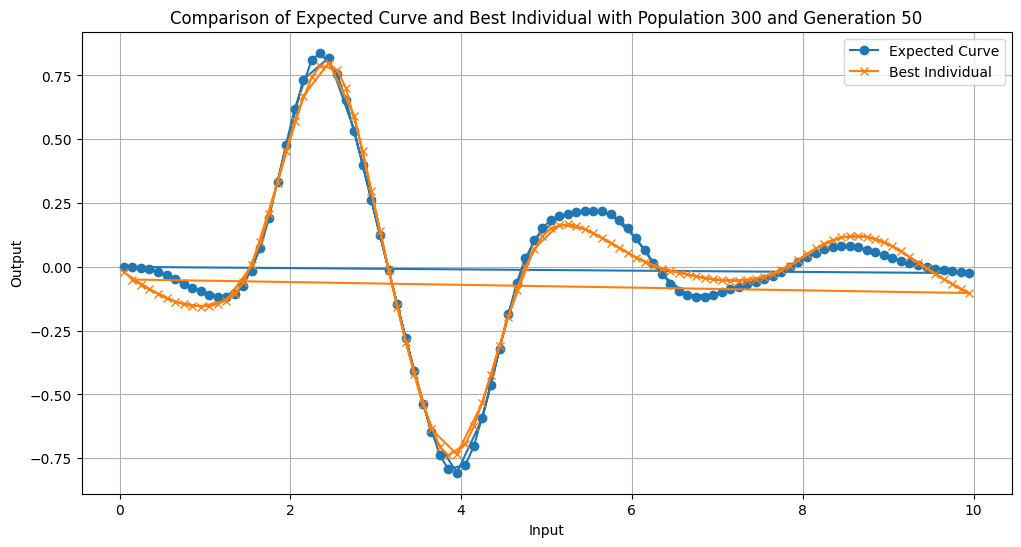

In [73]:
# Compile the best individual to a Python function
func = gp.compile(expr=best_individual, pset=pset)

# Generate outputs using the best individual
predicted_outputs = [func(x) for x, _ in data_points]
inputs = [x for x, _ in data_points]
expected_outputs = [y for _, y in data_points]


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(inputs, expected_outputs, 'o-', label='Expected Curve')
plt.plot(inputs, predicted_outputs, 'x-', label='Best Individual')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Comparison of Expected Curve and Best Individual with Population 300 and Generation 50')
plt.legend()
plt.grid(True)
plt.show()